In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('emp.csv')
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Time of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,12/12/1971,06:34:47 AM,45.66,44,12/18/2010,Q4,H2,2010,12,December,Dec,18,Saturday,Sat,6.61,119090,17%,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,10/31/1993,02:02:38 AM,23.76,52,4/25/2017,Q2,H1,2017,4,April,Apr,25,Tuesday,Tue,0.26,117991,14%,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,11/26/1994,03:48:27 PM,22.68,42,3/27/2017,Q1,H1,2017,3,March,Mar,27,Monday,Mon,0.34,161045,28%,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,11/24/1975,09:44:16 PM,41.70,43,2/25/2003,Q1,H1,2003,2,February,Feb,25,Tuesday,Tue,14.43,142616,16%,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,3/13/1995,09:30:28 PM,22.39,58,10/11/2016,Q4,H2,2016,10,October,Oct,11,Tuesday,Tue,0.79,135706,11%,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [4]:
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Time of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,12/12/1971,06:34:47 AM,45.66,44,12/18/2010,Q4,H2,2010,12,December,Dec,18,Saturday,Sat,6.61,119090,17%,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,10/31/1993,02:02:38 AM,23.76,52,4/25/2017,Q2,H1,2017,4,April,Apr,25,Tuesday,Tue,0.26,117991,14%,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,11/26/1994,03:48:27 PM,22.68,42,3/27/2017,Q1,H1,2017,3,March,Mar,27,Monday,Mon,0.34,161045,28%,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,11/24/1975,09:44:16 PM,41.70,43,2/25/2003,Q1,H1,2003,2,February,Feb,25,Tuesday,Tue,14.43,142616,16%,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,3/13/1995,09:30:28 PM,22.39,58,10/11/2016,Q4,H2,2016,10,October,Oct,11,Tuesday,Tue,0.79,135706,11%,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [5]:
df.drop(['Name Prefix','First Name','Middle Initial','Last Name','Emp ID', 'Gender', 'E Mail', "Father's Name", "Mother's Name","Mother's Maiden Name", 'Date of Birth', 'Time of Birth', 'Date of Joining','Month Name of Joining', 'Short Month', 'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ','User Name', 'Password','Place Name','Year of Joining'],axis=1,inplace=True)
df.head()

,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Last % Hike,County,City,State,Zip,Region
0,45.66,44,Q4,H2,12,18,6.61,119090,17%,Clark,Las Vegas,NV,89128,West
1,23.76,52,Q2,H1,4,25,0.26,117991,14%,Lake,Irons,MI,49644,Midwest
2,22.68,42,Q1,H1,3,27,0.34,161045,28%,Fayette,Lexington,KY,40501,South
3,41.70,43,Q1,H1,2,25,14.43,142616,16%,Lake,Munster,IN,46321,Midwest
4,22.39,58,Q4,H2,10,11,0.79,135706,11%,Fairbanks North Star,Fairbanks,AK,99709,West


In [6]:
df.shape

(1000, 14)

In [7]:
le = LabelEncoder()
df['Quarter of Joining']=le.fit_transform(df['Quarter of Joining'])
df['Half of Joining']=le.fit_transform(df['Half of Joining'])
df['Region']=le.fit_transform(df['Region'])
df['County'] = le.fit_transform(df['County'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])

In [8]:
df.head()

,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Last % Hike,County,City,State,Zip,Region
0,45.66,44,3,1,12,18,6.61,119090,17%,106,410,32,89128,3
1,23.76,52,1,0,4,25,0.26,117991,14%,276,362,21,49644,0
2,22.68,42,0,0,3,27,0.34,161045,28%,184,423,16,40501,2
3,41.70,43,0,0,2,25,14.43,142616,16%,276,521,14,46321,0
4,22.39,58,3,1,10,11,0.79,135706,11%,177,236,0,99709,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age in Yrs.             1000 non-null   float64
 1   Weight in Kgs.          1000 non-null   int64  
 2   Quarter of Joining      1000 non-null   int32  
 3   Half of Joining         1000 non-null   int32  
 4   Month of Joining        1000 non-null   int64  
 5   Day of Joining          1000 non-null   int64  
 6   Age in Company (Years)  1000 non-null   float64
 7   Salary                  1000 non-null   int64  
 8   Last % Hike             1000 non-null   object 
 9   County                  1000 non-null   int32  
 10  City                    1000 non-null   int32  
 11  State                   1000 non-null   int32  
 12  Zip                     1000 non-null   int64  
 13  Region                  1000 non-null   int32  
dtypes: float64(2), int32(6), int64(5), object

In [10]:
def convert_percent(val):
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """
    new_val = val.replace('%', '')
    return float(new_val) / 100

df['Last % Hike'] = df['Last % Hike'].apply(convert_percent)

In [11]:
df.head()

,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Last % Hike,County,City,State,Zip,Region
0,45.66,44,3,1,12,18,6.61,119090,0.17,106,410,32,89128,3
1,23.76,52,1,0,4,25,0.26,117991,0.14,276,362,21,49644,0
2,22.68,42,0,0,3,27,0.34,161045,0.28,184,423,16,40501,2
3,41.70,43,0,0,2,25,14.43,142616,0.16,276,521,14,46321,0
4,22.39,58,3,1,10,11,0.79,135706,0.11,177,236,0,99709,3


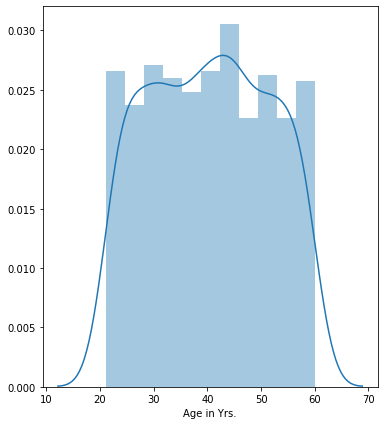

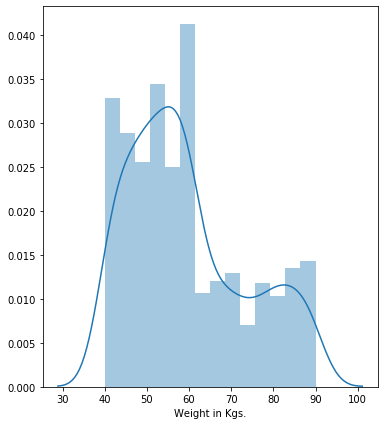

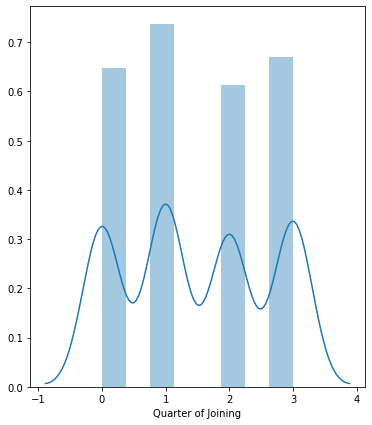

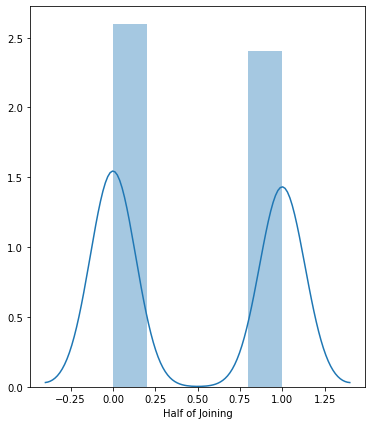

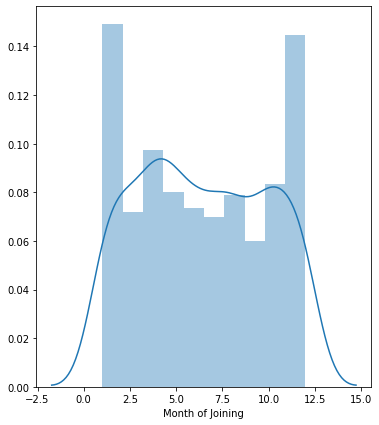

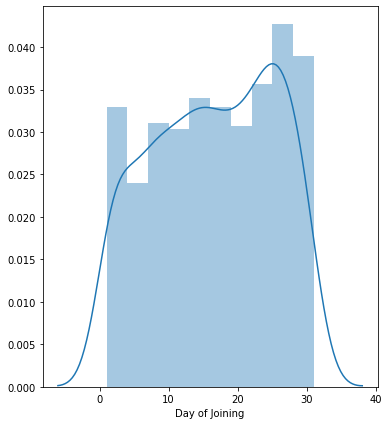

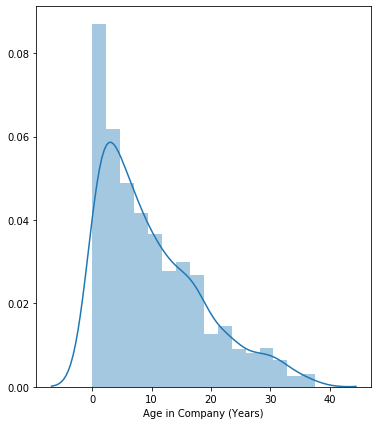

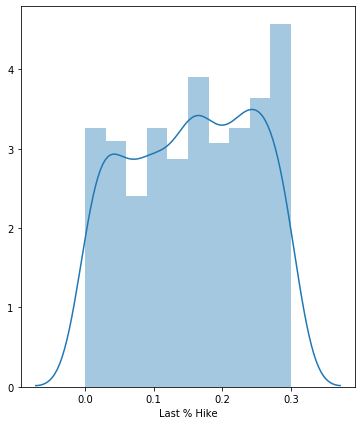

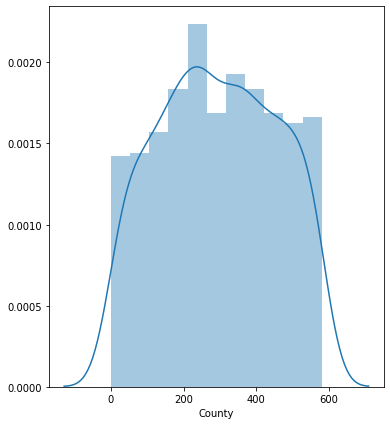

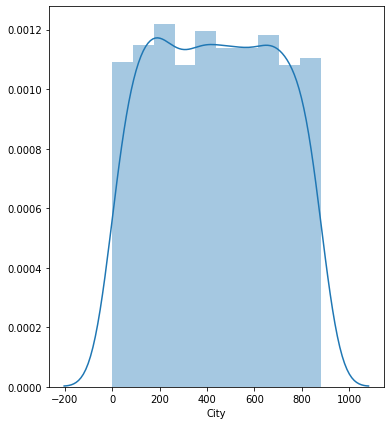

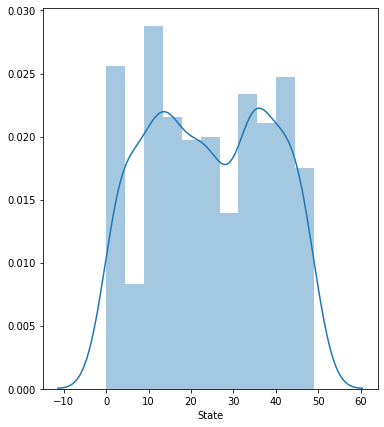

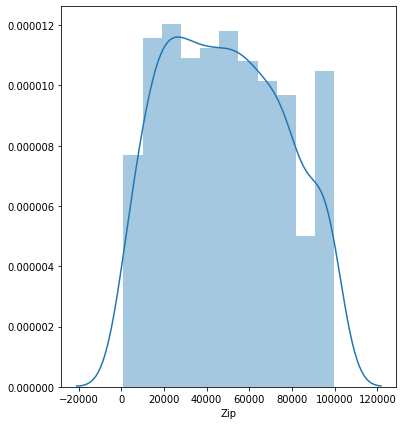

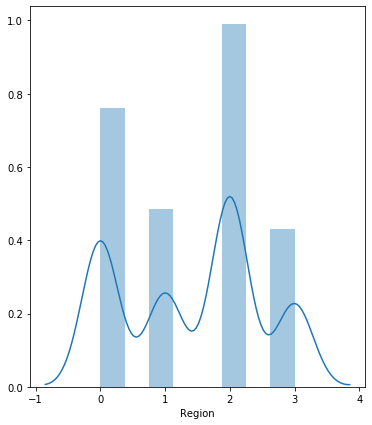

In [12]:
#looking for data distribution

#using distplot

for i in df.columns:
    if i!= 'Salary':
        plt.figure(figsize=(6,7))
        sns.distplot(df[i])
        plt.show()

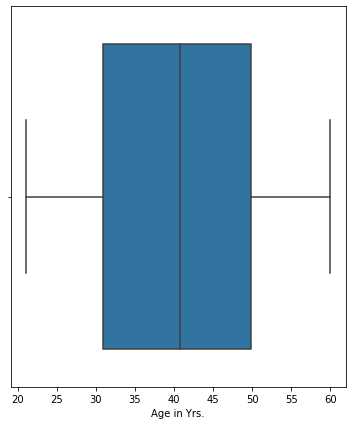

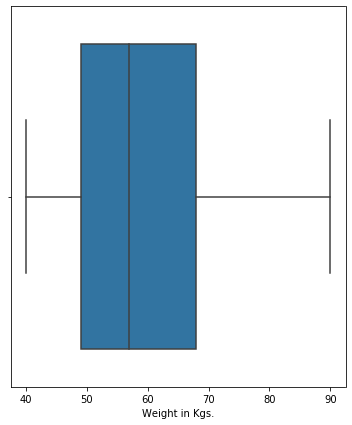

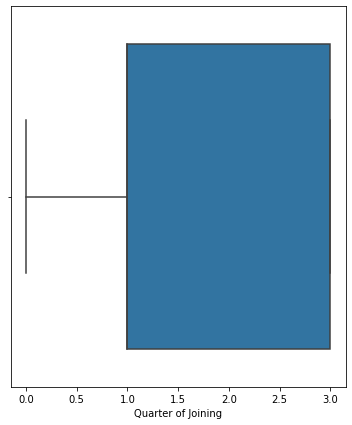

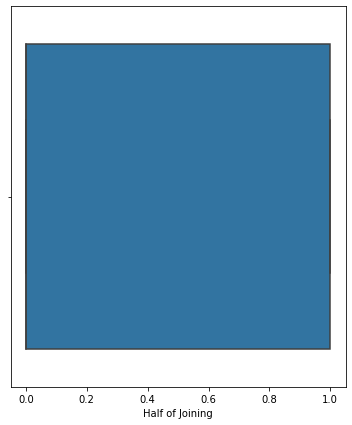

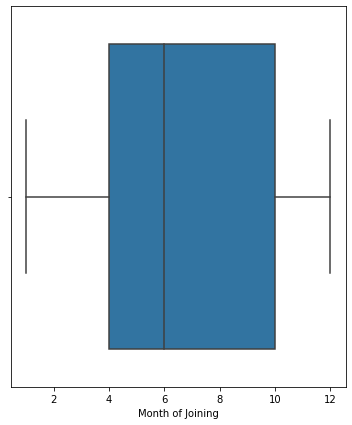

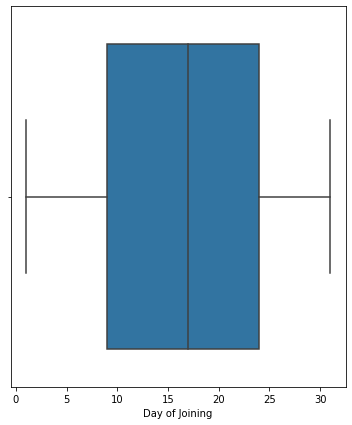

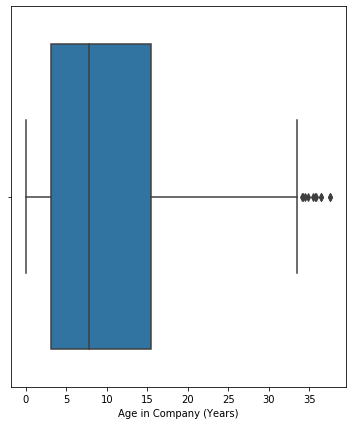

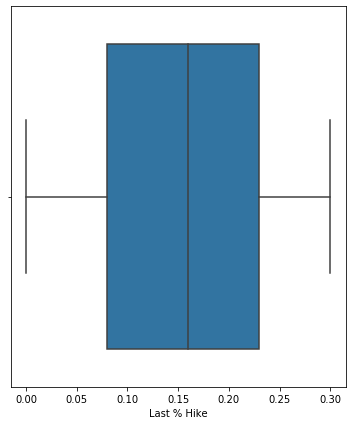

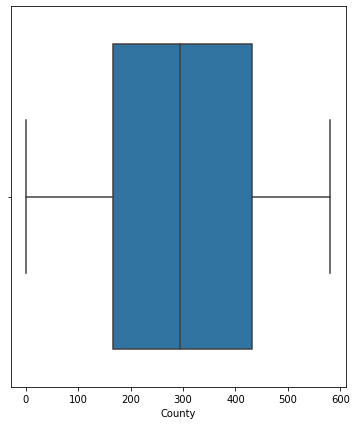

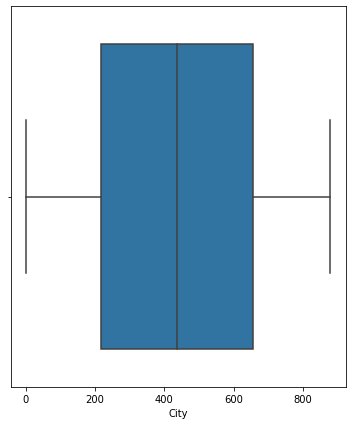

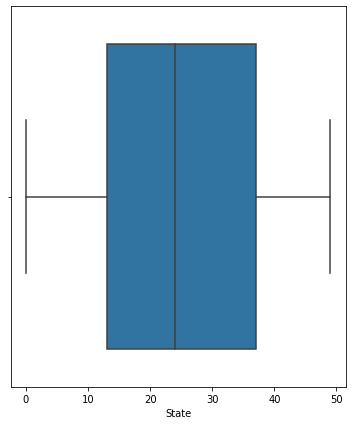

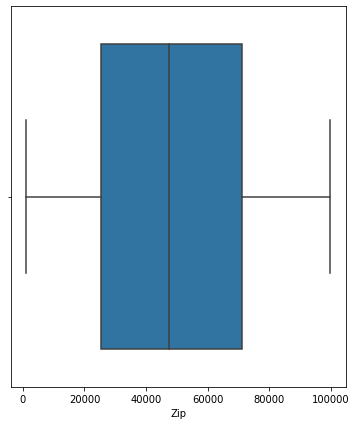

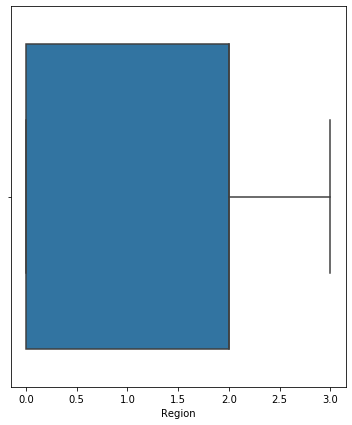

In [13]:
#looking for outliers now.

#will create a subplot of boxplot and then follow the Z-value rule to rule out the outliers.

for i in df.columns:
    if i!= 'Salary':
        plt.figure(figsize=(6,7))
        sns.boxplot(df[i])
        plt.show()

In [14]:
#following the Z-value rule

from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.47583025, 1.10909019, 1.35808004, ..., 0.52610404, 1.47648194,
        1.49185658],
       [1.49675646, 0.53327596, 0.43951101, ..., 0.24737156, 0.03452962,
        1.32296716],
       [1.59403471, 1.25304375, 1.33830654, ..., 0.59895138, 0.29937197,
        0.553582  ],
       ...,
       [1.75666052, 0.67722952, 1.33830654, ..., 1.44274295, 1.70484097,
        1.49185658],
       [0.91578914, 0.82118308, 1.33830654, ..., 1.30211102, 1.52611243,
        0.38469258],
       [1.74765327, 0.24536884, 1.33830654, ..., 0.73705194, 0.91524389,
        0.553582  ]])

In [15]:
threshold = 3
print(np.where(z>3))

(array([594, 621, 684, 999], dtype=int64), array([6, 6, 6, 6], dtype=int64))


In [16]:
df.skew()

Age in Yrs.               0.006173
Weight in Kgs.            0.657110
Quarter of Joining        0.045158
Half of Joining           0.076169
Month of Joining          0.057287
Day of Joining           -0.143305
Age in Company (Years)    0.968211
Salary                    0.034356
Last % Hike              -0.093021
County                   -0.003393
City                      0.012028
State                    -0.003067
Zip                       0.147698
Region                   -0.069554
dtype: float64

In [17]:
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i] = np.log1p(df[i])

In [18]:
df.skew()

Age in Yrs.               0.006173
Weight in Kgs.            0.320799
Quarter of Joining        0.045158
Half of Joining           0.076169
Month of Joining          0.057287
Day of Joining           -0.143305
Age in Company (Years)   -0.402185
Salary                    0.034356
Last % Hike              -0.093021
County                   -0.003393
City                      0.012028
State                    -0.003067
Zip                       0.147698
Region                   -0.069554
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

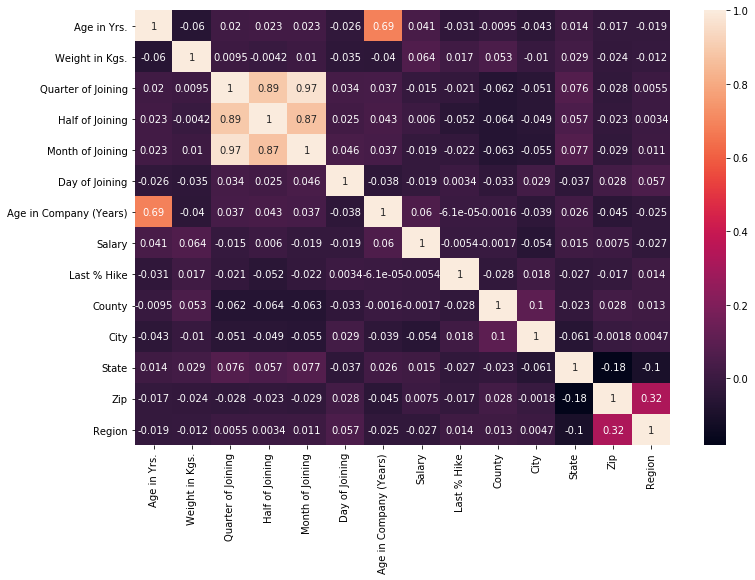

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show

In [20]:
X = df.drop('Salary',axis=1)
X.shape

(1000, 13)

In [21]:
y = df['Salary']
y.shape

(1000,)

In [30]:
#model building and checing of scores in loop

max_lr_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,lr_pred)
    if r2_scr>max_lr_score:
        max_lr_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_lr_score)

max r2_score for the given   95 is 0.01351391916185074


In [31]:
max_ls_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    ls = Lasso(alpha=0.001)
    ls.fit(X_train,y_train)
    ls_pred = ls.predict(x_test)
    r2_scr = r2_score(y_test,ls_pred)
    if r2_scr>max_ls_score:
        max_ls_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_ls_score)

max r2_score for the given   95 is 0.01351393460056105


In [32]:
max_rg_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    rg = Ridge(alpha=0.001)
    rg.fit(X_train,y_train)
    rg_pred = rg.predict(x_test)
    r2_scr = r2_score(y_test,rg_pred)
    if r2_scr>max_rg_score:
        max_rg_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_rg_score)

max r2_score for the given   95 is 0.01351399084787741


In [33]:
max_en_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    en = ElasticNet(alpha=0.001)
    en.fit(X_train,y_train)
    en_pred = en.predict(x_test)
    r2_scr = r2_score(y_test,en_pred)
    if r2_scr>max_en_score:
        max_en_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_en_score)

max r2_score for the given   95 is 0.01353409665766192


In [34]:
#saving the model
from sklearn.externals import joblib
joblib.dump(lr_pred,'Salary.pkl')

['Salary.pkl']